In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("/scratch/bclab/jiayu/Active-learning/Data/new_activity_all.csv")
len(data)

28585

In [2]:
def plotdist(data_col, data_label):
    plt.figure(figsize=(8, 5)) # Larger figure size for better clarity

    n, bins, patches = plt.hist(data_col, bins=50, alpha=0.75, color='royalblue', edgecolor='black')

    plt.xlabel('Activity value', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title(data_label, fontsize=16)
    plt.grid(axis='y', alpha=0.75)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()

In [3]:
data

,sequence,expression_log2,data_batch_name,cnn_validation_set,cnn_train
0,GTCACAGCTTTACAGCCTTCGGATGTTTCCAAAGTCTCCGCTCGAT...,2.352405,Genomic,True,True
1,TAAGCTGAGGGTTAATTCCCATGGCCCTGAAGAATGAGAAGGCATT...,-0.046013,Genomic,True,True
2,GAGCCACTTGGCTTGGCGTAGGCTTTTGAGATCTCAAAGTCCACCA...,2.066459,CrxMotifMutant,False,True
3,GAGCCACTTGGCTTGGCTTAGGCTTTTGAGATCTCAAAGTCCACCA...,3.731364,Genomic,True,True
4,GGCGTGGCTCCAGTCACATTTTATGAGGCACTGGGTTTCAAACCTA...,0.956284,Genomic,True,False
...,...,...,...,...,...
28580,ATGACATACGTTTAATTCCGTCAGCAATTCAGGTATGAATCCTGAG...,6.033458,Round4b,False,True
28581,ATGACATACGTTTAATTCCCCTTTAGTATAAGGTATGAATTTAATT...,5.342974,Round4b,False,True
28582,ATGACATACGTTTAATTCCCCTTTAGTATAAGGTATGAATCCTGAG...,4.999204,Round4b,False,True
28583,ATGACATACGTTTAATTCCCCTTTAGTATAAGGTATGAATCCTGAG...,6.003270,Round4b,False,True


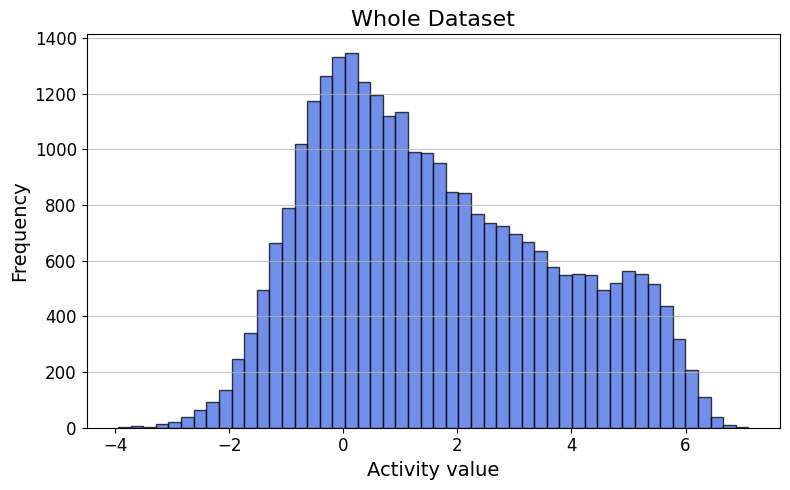

In [15]:
plotdist(data["expression_log2"], "Whole Dataset")

## Initial Genomic Data

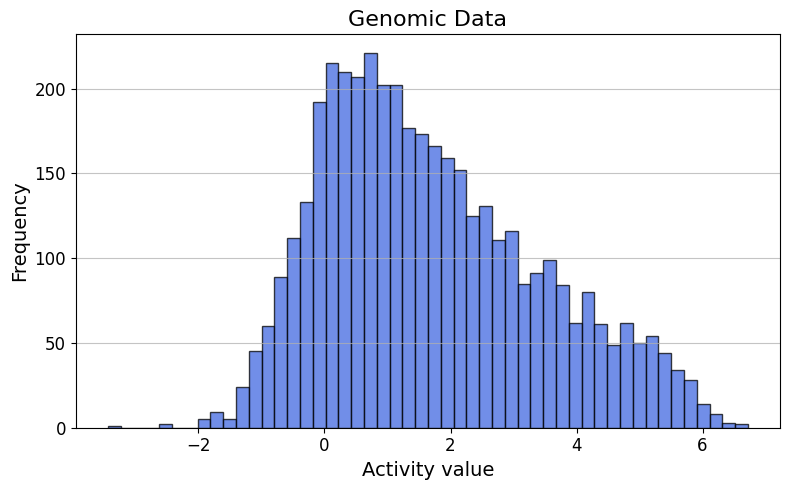

In [16]:
genomic_data = data[data["cnn_train"] & data["data_batch_name"].isin(["Genomic"])]
plotdist(genomic_data["expression_log2"], "Genomic Data")

## Start Round 1
### Sample 5000 from remaining data

In [6]:
batches_to_use = [
            "CrxMotifMutant",
            "Round2",
            "Round3a",
            "Round3b",
            "Round4b",
        ]
data_except_genomic = data[data["cnn_train"] & data["data_batch_name"].isin(batches_to_use)]
data_except_genomic.to_csv("/scratch/bclab/jiayu/Active-learning/Data/new_activity_no_genomic.csv", index=False)

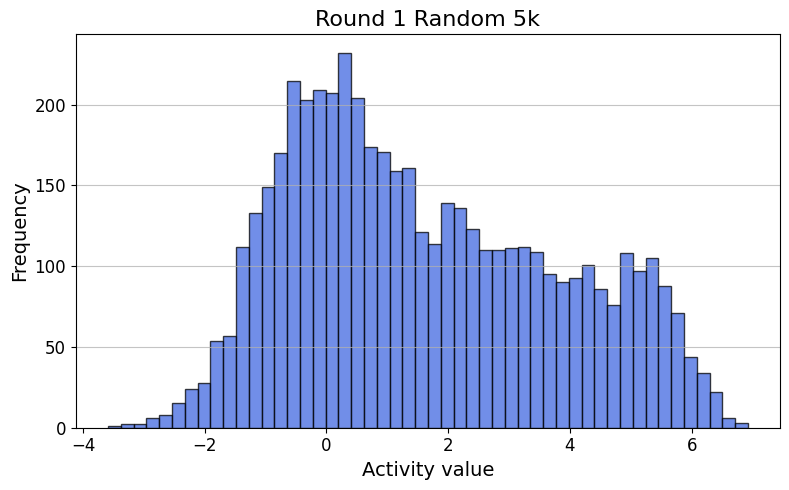

In [20]:
round1_5k = data_except_genomic.sample(n=5000)
round1_5k.to_csv("/scratch/bclab/jiayu/Active-learning/Data/new_random_5k_round1.csv", index=False)
plotdist(round1_5k["expression_log2"], "Round 1 Random 5k")

### Save the remaining data from random sampling

In [22]:
round1_remain = data_except_genomic.drop(round1_5k.index)
round1_remain.to_csv("/scratch/bclab/jiayu/Active-learning/Data/new_round1_random_remain.csv", index=False)

### Distribution of 5k from uncertainty sampling

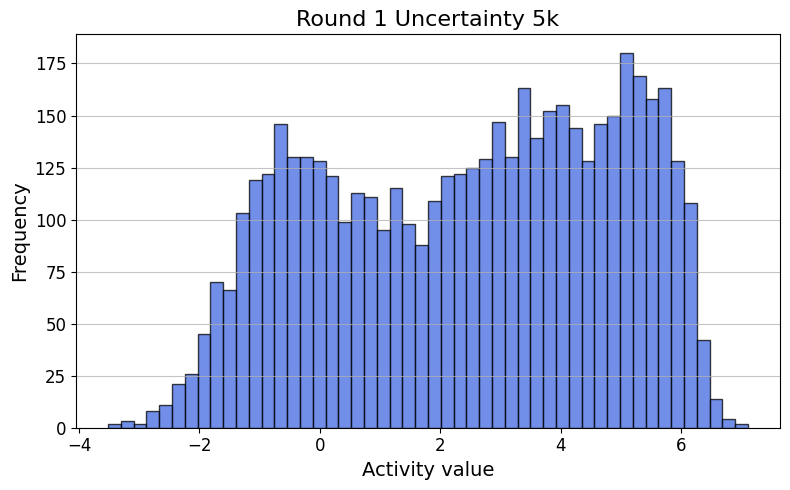

In [8]:
round1_uncertainty_5k = pd.read_csv("/scratch/bclab/jiayu/Active-learning/Data/new_uncertainty_5k_round1.csv")
plotdist(round1_uncertainty_5k["expression_log2"], "Round 1 Uncertainty 5k")

## Start Round 2
### Sample 5000 from round 1 remaining

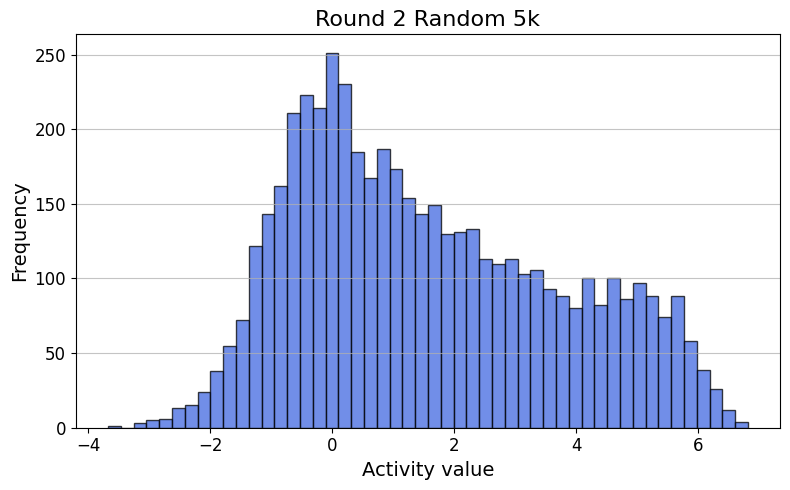

In [11]:
round1_random_remain = pd.read_csv("/scratch/bclab/jiayu/Active-learning/Data/new_round1_random_remain.csv")
round2_5k = round1_random_remain.sample(n=5000)
round2_5k.to_csv("/scratch/bclab/jiayu/Active-learning/Data/new_random_5k_round2.csv", index=False)
plotdist(round2_5k["expression_log2"], "Round 2 Random 5k")

### Save the remaining data from random sampling

In [12]:
round2_remain = round1_random_remain.drop(round2_5k.index)
round2_remain.to_csv("/scratch/bclab/jiayu/Active-learning/Data/new_round2_random_remain.csv", index=False)

### Distribution of 5k from uncertainty sampling

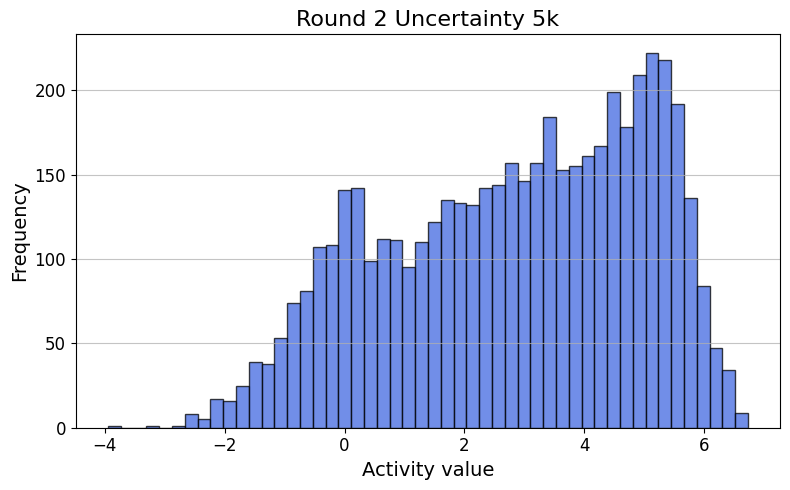

In [15]:
round2_uncertainty_5k = pd.read_csv("/scratch/bclab/jiayu/Active-learning/Data/new_uncertainty_5k_round2.csv")
plotdist(round2_uncertainty_5k["expression_log2"], "Round 2 Uncertainty 5k")

## Start Round 3
### Sample 5000 from round 2 remaining

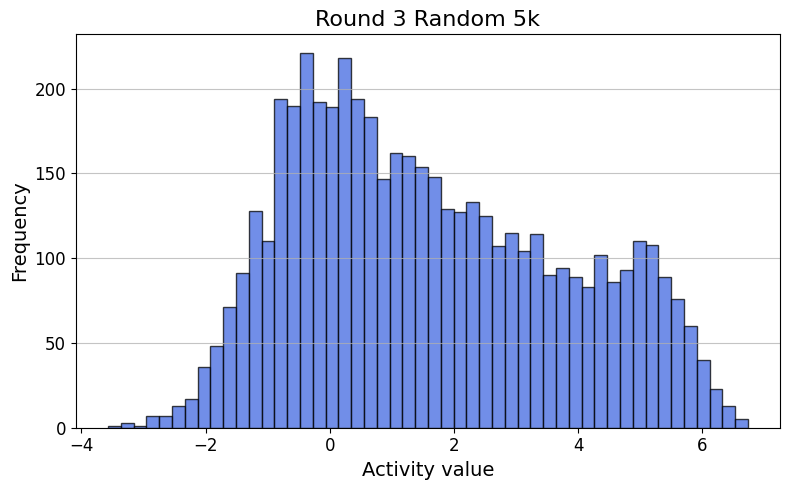

In [16]:
round2_random_remain = pd.read_csv("/scratch/bclab/jiayu/Active-learning/Data/new_round2_random_remain.csv")
round3_5k = round2_random_remain.sample(n=5000)
round3_5k.to_csv("/scratch/bclab/jiayu/Active-learning/Data/new_random_5k_round3.csv", index=False)
plotdist(round3_5k["expression_log2"], "Round 3 Random 5k")

### Save the remaining data from random sampling

In [17]:
round3_remain = round2_random_remain.drop(round3_5k.index)
round3_remain.to_csv("/scratch/bclab/jiayu/Active-learning/Data/new_round3_random_remain.csv", index=False)

### Distribution of 5k from uncertainty sampling

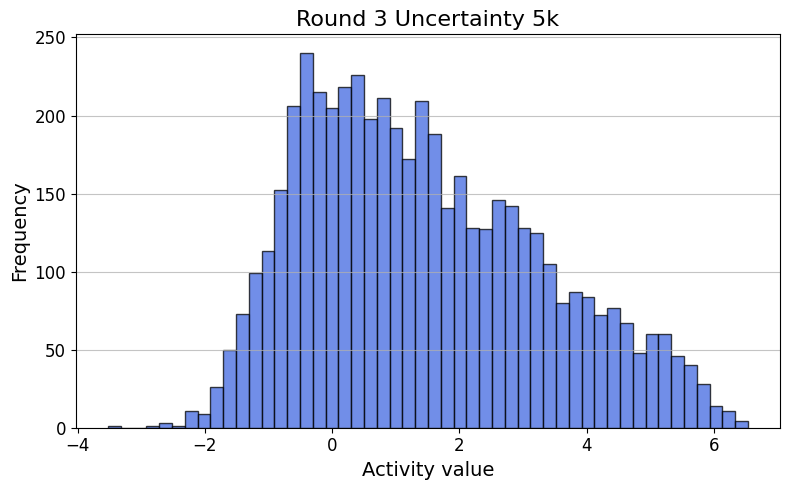

In [18]:
round3_uncertainty_5k = pd.read_csv("/scratch/bclab/jiayu/Active-learning/Data/new_uncertainty_5k_round3.csv")
plotdist(round3_uncertainty_5k["expression_log2"], "Round 3 Uncertainty 5k")

## Start Round 4
### Sample 5000 from round 3 remaining

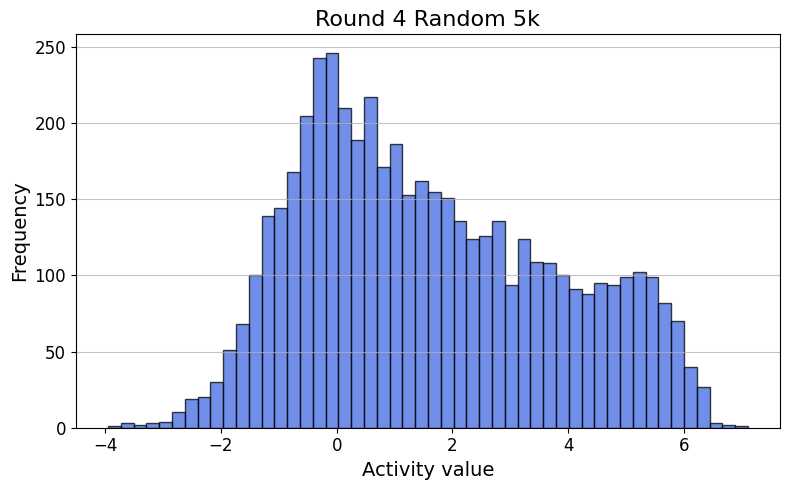

In [3]:
round3_random_remain = pd.read_csv("/scratch/bclab/jiayu/Active-learning/Data/new_round3_random_remain.csv")
round4_5k = round3_random_remain.sample(n=5000)
round4_5k.to_csv("/scratch/bclab/jiayu/Active-learning/Data/new_random_5k_round4.csv", index=False)
plotdist(round4_5k["expression_log2"], "Round 4 Random 5k")

### Save the remaining data from random sampling

In [4]:
round4_remain = round3_random_remain.drop(round4_5k.index)
round4_remain.to_csv("/scratch/bclab/jiayu/Active-learning/Data/new_round4_random_remain.csv", index=False)

### Distribution of 5k from uncertainty sampling

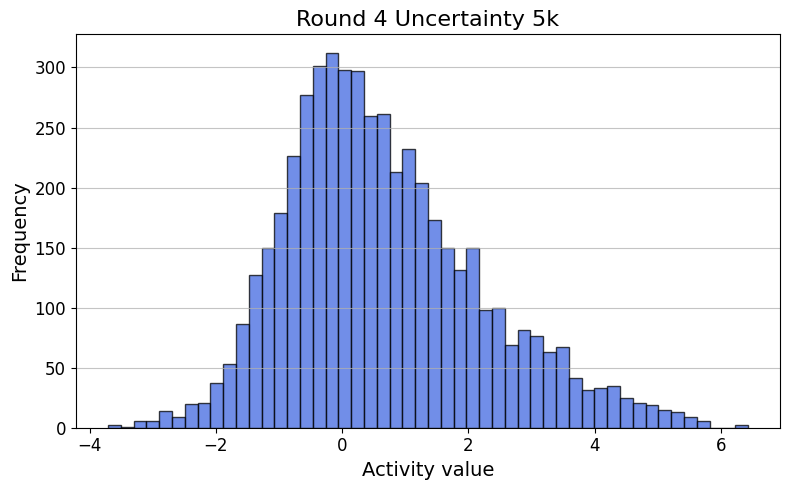

In [5]:
round4_uncertainty_5k = pd.read_csv("/scratch/bclab/jiayu/Active-learning/Data/new_uncertainty_5k_round4.csv")
plotdist(round4_uncertainty_5k["expression_log2"], "Round 4 Uncertainty 5k")